In [1]:
import pandas as pd
import numpy as np

In [52]:
df1 = pd.read_csv('../Narcotics_Dataset.csv')
# df2 = pd.read_csv('narc_data.csv', encoding= 'unicode_escape')

In [53]:
df1.head()

,SL\nNo.,DATE OF\nSEIZURE,SEIZING\nAGENCY,QUANTITY AND\nDRUG SEIZED\n(IN KGS.),PLACE\nOF\nORIGIN,INTENDED\nDESTINAT\nION,NAME OF\nPERSONS ARRESTED,NATION-\nALITY,AGE,SEX
0,1,01.02.2019,RPF/NCB\nGuwahati,24.500 kg\nGanja,-,-,1.Sanjoy Das\n2.Juyel Das,Indian\nIndian,32\n42,M\nM
1,2,02.02.2019,"NCB Imphal along with NAB,State Police & Distr...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-
2,3,02.02.2019,BAF/NCB\nAmritsar,3.990 kg\nHeroin & 80\ngram Opium,SWA,-,-,-,-,-
3,4,02.02.2019,"Customs,\nSIIB, New\nDelhi",581.455 kg of\nDry Chatt/Khat,Ethiopia,-,1.Ahmed Hassan,Somalian,30,M
4,5,04.02.2019,"NCB Imphal along with NAB, Manipur Rifles,Stat...",Destroyed illicit cultivation of Opuim spread ...,-,-,-,-,-,-


In [51]:
# df2.head()

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   SL
No.                              46 non-null     object
 1   DATE OF
SEIZURE                     45 non-null     object
 2   SEIZING
AGENCY                      48 non-null     object
 3   QUANTITY AND
DRUG SEIZED
(IN KGS.)  49 non-null     object
 4   PLACE
OF
ORIGIN                     43 non-null     object
 5   INTENDED
DESTINAT
ION               43 non-null     object
 6   NAME OF
PERSONS ARRESTED            70 non-null     object
 7   NATION-
ALITY                       70 non-null     object
 8   AGE                                 70 non-null     object
 9   SEX                                 70 non-null     object
dtypes: object(10)
memory usage: 16.5+ KB


In [55]:
# df2.info()

In [56]:
df1.shape

(210, 10)

In [95]:
# df2.shape

In [57]:
df1.keys()

Index(['SL\nNo.', 'DATE OF\nSEIZURE', 'SEIZING\nAGENCY',
       'QUANTITY AND\nDRUG SEIZED\n(IN KGS.)', 'PLACE\nOF\nORIGIN',
       'INTENDED\nDESTINAT\nION', 'NAME OF\nPERSONS ARRESTED',
       'NATION-\nALITY', 'AGE', 'SEX'],
      dtype='object')

In [58]:
df1['SL\nNo.']

0              1
1              2
2              3
3              4
4              5
         ...    
205          NaN
206          NaN
207          NaN
208          NaN
209    *********
Name: SL\nNo., Length: 210, dtype: object

In [63]:
dfnon = df1.dropna(subset=['DATE OF\nSEIZURE'])
dfnon['DATE OF\nSEIZURE'].unique()

array(['01.02.2019', '02.02.2019', '04.02.2019', '05.02.2019',
       '06.02.2019', '07.02.2019', '10.02.2019', '11.02.2019',
       '13.02.2019', '14.02.2019', '15.02.2019', '16.02.2019',
       '17.02.2019', '18.02.2019', '19.02.2019', '20.02.2019',
       '21.02.2019', '22.02.2019', '23.02.2019', '25.02.2019',
       '27.02.2019', 'Feb., 2019'], dtype=object)

In [64]:
dups = dfnon.pivot_table(index = ['DATE OF\nSEIZURE'], aggfunc ='size')
dups

DATE OF\nSEIZURE
01.02.2019    1
02.02.2019    3
04.02.2019    2
05.02.2019    4
06.02.2019    3
07.02.2019    3
10.02.2019    1
11.02.2019    2
13.02.2019    1
14.02.2019    1
15.02.2019    2
16.02.2019    2
17.02.2019    2
18.02.2019    2
19.02.2019    4
20.02.2019    1
21.02.2019    2
22.02.2019    3
23.02.2019    2
25.02.2019    2
27.02.2019    1
Feb., 2019    1
dtype: int64

<AxesSubplot:xlabel='DATE OF\nSEIZURE'>

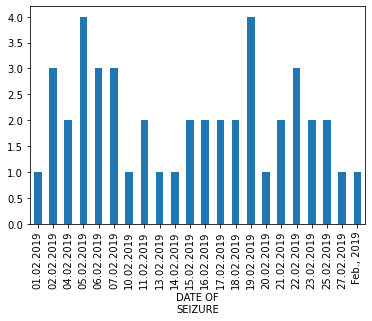

In [65]:
dups.plot(kind='bar')

In [66]:
dfnon2 = df1.dropna(subset=['NATION-\nALITY'])

In [75]:
dfnon2['NATION-\nALITY'].unique()

array(['Indian\nIndian', '-', 'Somalian', 'Indian',
       'Indian\nIndian\nIndian\nIndian', 'Venezuela', 'Nepalese'],
      dtype=object)

In [92]:
arr = np.array(dfnon2['NATION-\nALITY'])
key_dict = {}
key_dict['Indian']=0
key_dict['Venezuela']=0
key_dict['Nepalese']=0
key_dict['Somalian']=0

for nationality in arr:
    if nationality == '-':
        continue
    for indiv in nationality.split('\n'):
        key_dict[indiv] = key_dict[indiv]+1
        
key_dict

{'Indian': 49, 'Venezuela': 1, 'Nepalese': 11, 'Somalian': 1}

([<matplotlib.axis.XTick at 0x7ff404371eb0>,
 [Text(0, 0, 'Indian'),
  Text(1, 0, 'Venezuela'),
  Text(2, 0, 'Nepalese'),
  Text(3, 0, 'Somalian')])

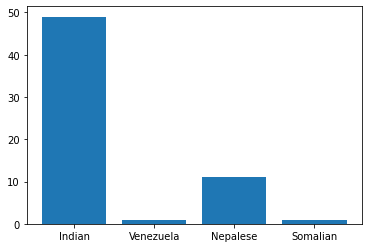

In [137]:
import matplotlib.pyplot as plt

plt.bar(range(len(key_dict)), list(key_dict.values()), align='center')
plt.xticks(range(len(key_dict)), list(key_dict.keys()))

In [155]:
# plotting male female statistics
dfnon3 = df1.dropna(subset = ['SEX']) 
dfnon4 = dfnon3.drop(dfnon3[dfnon3['SEX'] == '-'].index)
dups2 = dfnon4.pivot_table(index = ['SEX'], aggfunc ='size')
dups2

SEX
F              5
M             35
M\nM           9
M\nM\nM\nM     1
dtype: int64

([<matplotlib.patches.Wedge at 0x7ff404165250>,
 [Text(-1.0648848457419238, 0.27571772759327495, 'M'),
  Text(1.064884858649201, -0.27571767774241696, 'F')],
 [Text(-0.5808462794955948, 0.15039148777814995, '92%'),
  Text(0.5808462865359277, -0.15039146058677288, '8%')])

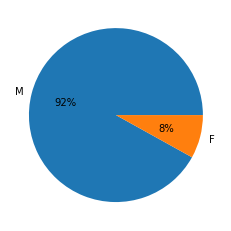

In [162]:
sex_array = np.array(dfnon4['SEX'])
sex_array

count_male = 0
count_female = 0

for sex in sex_array:
    for s in sex.split('\n'):
        if s == 'M':
            count_male = count_male + 1
        elif s == 'F':
            count_female = count_female + 1
            

plt.pie([count_male, count_female], labels = ['M', 'F'], autopct='%1.0f%%')